# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [370]:
# Import the appropriate libraries

import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_rows",None,"display.max_columns",None,"display.width",None)

# Create two new dataframes

northcallcenter = pd.read_csv('NorthCallCenter.csv')
northcallcenter.name = "North Call Center"
southcallcenter = pd.read_csv('SouthCallCenter.csv')
southcallcenter.name = "South Call Center"

In [371]:
northcallcenter.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [372]:
northcallcenter.shape

(245, 15)

In [373]:
southcallcenter.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [374]:
southcallcenter.shape

(314, 15)

In [375]:
pp.ProfileReport(northcallcenter)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [376]:
pp.ProfileReport(southcallcenter)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [377]:
# Put your EDA code here

def eda_answers(dataframe):
    print(
    dataframe.name," details: \n\n","Number of reps: \n",
    dataframe['Rep ID'].value_counts().count(),"\n\n",
    "\nReps | number of calls assigned:\n",
    dataframe['Rep ID'].value_counts(),"\n\n","Averages: \n",
    dataframe[['Busy Minutes','Incoming Wait Time','During Call Wait Time']].mean(),"\n\n","Number of calls per each time block: \n",
    dataframe['Time Block'].value_counts())
    
    

print(eda_answers(northcallcenter))
print(eda_answers(southcallcenter))


North Call Center  details: 

 Number of reps: 
 9 

 
Reps | number of calls assigned:
 Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64 

 Averages: 
 Busy Minutes             9.987755
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64 

 Number of calls per each time block: 
 12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64
None
South Call Center  details: 

 Number of reps: 
 11 

 
Reps | number of calls assigned:
 Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64 

 Averages: 
 Busy Minutes             10.054140
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64 

 Number of calls per each

### EDA Results

Make note of your results here!

1. How many reps are in each branch?


North Call Center has 9 reps, while South Call Center has 11 reps.

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

North Call center has an average busy minutes of 9.98, an average not ready minutes of 3.04, and an average incoming wait time of 2.96. 
South Call Center has an average busy minutes of 10.05, an average not ready minutes of 3.00 and an average incoming wait time of 3.07.
    
3. What is the number of calls taken for each time block?

North Call Center has taken the following number of calls for each time block: 
9AM:5, 10AM:43, 11AM:25, 12PM:45, 1PM:17, 2PM:35, 3PM:30, 4PM:28, 5PM:17.

South Call Center has taken the following number of calls for each time block: 
9AM:5, 10AM:56, 11AM:31, 12PM:75, 1PM:23, 2PM:30, 3PM:43, 4PM:25, 5PM:26.

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [378]:
# Clean your data here

def cleaningdata_answers(dataframe):
    
    print(dataframe.name,
          
    " info: \n",
    
    dataframe.info(),
    
    "\n\nDataframe: ",
          
    dataframe)
    
    #dataframe[dataframe['Incoming or Outgoing'] == 'Outgoing']
    #outgoing = dataframe[dataframe['Incoming or Outgoing'] == 'Outgoing']
    #incomingNull = dataframe[dataframe['Incoming Wait Time'].isna()]
    #print(outgoing)
    #print(incomingNull)
    #print(dataframe['Sale'].str.len().value_counts())
    
    dataframe['Sale'] = dataframe['Sale'].str.strip()
    
    print(dataframe.name, "sales : \n",dataframe['Sale'].value_counts(),
    
    dataframe.loc[dataframe.duplicated(),:])
          
    
    
    
    


In [379]:
cleaningdata_answers(northcallcenter)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [380]:
print(cleaningdata_answers(southcallcenter))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

Yes, all incoming wait time that is null (163 null values, 82 non null values for North; 188 null values, 126 non null values for South) correspond to outgoing calls. All incoming calls have an incoming wait time that is non null.

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

One value for Yes had a leading or trailing space. This created 2 separate yes values - one with appropriate length of 3, and another with a length of 4. Once the values were stripped of the leading and trailing spaces, there is only one value for Yes that has the appropriate length of 3.

3. Are there duplicates in the two data sets? If there are, how did you handle them?

There are a few ways I looked for / handled any potential duplicates.
Firstly, I used Pandas Profiling Report for both call centers which very quickly told me there were no duplicated rows in either call center's dataframe.

Secondly, I thought to use shape to find out how many rows x columns are in each dataframe originally - north call center has 245 rows and 15 columns, whereas south call center has 314 rows and 15 columns. When .drop_duplicates() is then called and shape is reran, if there are any lesser number of rows or columns than originally, then I know there were duplicates and that they were removed.

The last method I thought to use, in addition to the Pandas Profiling report is to use .loc and .duplicated() to first find and extract any duplicated rows, and then add the parameter keep - first or last to then drop the specified duplicate records. However, since there are no duplicates, no method was needed to handle them.


4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

I prefer more data than less. Considering the question we are attempting to answer for this assignment - 
"Explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance", there could be a few columns that are unneeded. I always side with caution when pairing down data, you never know what could be insightful especially paired with other information. If I absolutely had to choose which columns could be irelevant, they would be: Queue, Sale, Calls. Queue may be useful for load balancing, to ensure there isnt a disproportionate number of calls going into one queue and not another, causing inefficiency that can be fixed without additional resources. Sale - Yes or No may not be needed because we arent measuring sales for this exercise. Lastly, Calls appears to all have the same value - each row/record corresponds to 1 call, so no need for that column at all, except where referenced below.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [381]:
# Manipulate data here

frames = [northcallcenter , southcallcenter]

df = pd.concat(frames)

df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [382]:
df.groupby(['Branch','Rep ID']).sum().sort_values(['Branch','Calls'],ascending=False)

Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
South  Eric          5039          0          0           361   
       Randy         4576          3          1           320   
       Sandy         4694          1          0           325   
       Helga         5236          0          2           292   
       George        4620          0          0           298   
       Kate          4615          0          0           291   
       Karl          4532          1          0           287   
       Josh          3960          3          0           260   
       Susan         4006          2          0           267   
       Sharon        4226          1          1           257   
       Alice         3637          0          0           199   
North  Brent         4840          0          1           362   
       Lilly         3375          0          2           307   
       Duke          2999          2          0           292   
       Todd          4252          1          0           296   
       Joe           3178          0          0           256   
       Cam           2746          1          0           233   
       Xander        3340          1          0           244   
       Amanda        2666          0          1           229   
       Andy          2494          0          3           228   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
South  Eric                   54                47.0                    112   
       Randy                  66                47.0                     98   
       Sandy                  60                34.0                    100   
       Helga                  58                36.0                     95   
       George                 53                41.0                     87   
       Kate                   61                37.0                     83   
       Karl                   61                26.0                     85   
       Josh                   50                31.0                     83   
       Susan                  53                35.0                     88   
       Sharon                 38                29.0                     77   
       Alice                  46                15.0                     58   
North  Brent                  71                17.0                    117   
       Lilly                  59                37.0                     88   
       Duke                   56                39.0                     85   
       Todd                   58                21.0                     97   
       Joe                    49                36.0                     81   
       Cam                    46                32.0                     66   
       Xander                 44                20.0                     68   
       Amanda                 43                12.0                     60   
       Andy                   43                36.0                     65   

               Calls  
Branch Rep ID         
South  Eric       35  
       Randy      33  
       Sandy      32  
       Helga      31  
       George     29  
       Kate       29  
       Karl       28  
       Josh       26  
       Susan      26  
       Sharon     25  
       Alice      20  
North  Brent      37  
       Lilly      30  
       Duke       29  
       Todd       29  
       Joe        26  
       Cam        24  
       Xander     24  
       Amanda     23  
       Andy       23

In [383]:
print("Average Call Abandonment Rate - Company: \n",((df['Abandoned'].sum()/df['Calls'].sum()*100).round(2)),"%")

df.groupby(['Branch']).sum()

Average Call Abandonment Rate - Company: 
 1.97 %


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,
North,29890,5,7,2447,469,250.0,727,245
South,49141,11,4,3157,600,378.0,966,314


In [384]:
print("Average Call Abandonment Rate - North: \n",((northcallcenter['Abandoned'].sum()/northcallcenter['Calls'].sum()*100).round(2)),"%")

Average Call Abandonment Rate - North: 
 2.86 %


In [385]:
print("Average Call Abandonment Rate - South: \n",((southcallcenter['Abandoned'].sum()/southcallcenter['Calls'].sum()*100).round(2)),"%")

Average Call Abandonment Rate - South: 
 1.27 %


In [386]:
#service level KPI: for each incoming call, incoming wait time is 2 seconds or less.

def servicelevelKPI(dataframe):
    dataframe[dataframe['Incoming Wait Time'] < 3]
    incoming = dataframe[dataframe['Incoming or Outgoing'] == 'Incoming']
    servicelevelpass = incoming['Incoming Wait Time'] < 3
    servicelevelpass.value_counts()
    slKPI = ((servicelevelpass.sum()/incoming['Calls'].count())*100).round(2)
    print("Service Level KPI: ",slKPI,"%")

In [387]:
servicelevelKPI(df)

Service Level KPI:  38.94 %


In [388]:
servicelevelKPI(northcallcenter)

Service Level KPI:  40.24 %


In [389]:
servicelevelKPI(southcallcenter)

Service Level KPI:  38.1 %


In [390]:
#average speed to answer

def averagespeedtoanswer(dataframe):
    incoming = dataframe[dataframe['Incoming or Outgoing'] == 'Incoming']
    print("Average Speed to Answer (seconds): ",incoming['Incoming Wait Time'].mean())
    

In [391]:
averagespeedtoanswer(df)

Average Speed to Answer (seconds):  3.019230769230769


In [392]:
averagespeedtoanswer(northcallcenter)

Average Speed to Answer (seconds):  3.048780487804878


In [393]:
averagespeedtoanswer(southcallcenter)

Average Speed to Answer (seconds):  3.0


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

Eric from South Call Center and Brent from North Call Center have the highest number of calls, with 35 and 37 calls respectively.

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

North call center has an average abandonment rate of 2.86% while South Call Center has an average abandonment rate of 1.27%, and the whole company has a rate of 1.97%. None of these exceed the optimal range of 2-5%, in fact the whole company is doing quite well, coming in under the optimal range which in this case is favorable. There is an opportunity to reduce the abadonment rate of the North Call center to under 2% however it should not be made a priority over other areas needing improvement. A "nice to have" at this point.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

The service level KPI for the North Call Center is 40.24%, meaning ~40% of calls were answered within 2 seconds or less. The service level KPI for the South Call Center is a little worse, coming in at 38.1% of calls being answered within 2 seconds. The whole company's service level KPI comes in at 38.94%. There is definately an opportunity to improve here. 

4. For each branch and the entire company, what is the average speed of answer?
The average speed of answer for the North Call Center is 3.05 seconds, the South Call Center 3.0 seconds, and the average for the company is 3.02. There is room for improvement here.

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

<BarContainer object of 4 artists>

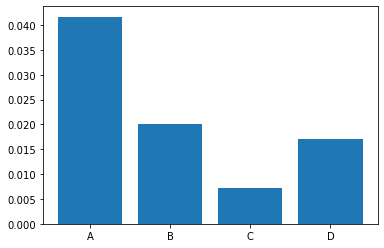

In [394]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

keys = abandonment_rates.keys()
values = abandonment_rates.values()

plt.bar(keys,values)

    Rep ID  Incoming Wait Time
0    Alice            2.500000
1   Amanda            2.400000
2     Andy            3.600000
3    Brent            2.125000
4      Cam            2.909091
5     Duke            2.785714
6     Eric            2.611111
7   George            3.153846
8    Helga            3.272727
9      Joe            3.600000
10    Josh            3.444444
11    Karl            2.888889
12    Kate            3.363636
13   Lilly            3.083333
14   Randy            2.937500
15   Sandy            2.615385
16  Sharon            3.625000
17   Susan            2.916667
18    Todd            3.500000
19  Xander            3.333333
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Alice         3        6        50.000000
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Eric         

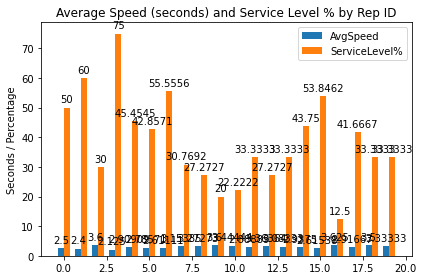

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


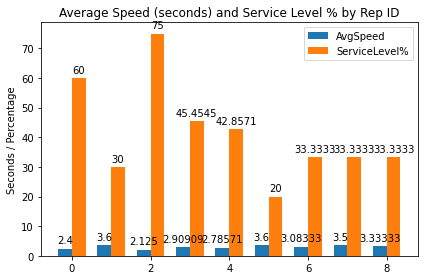

    Rep ID  Incoming Wait Time
0    Alice            2.500000
1     Eric            2.611111
2   George            3.153846
3    Helga            3.272727
4     Josh            3.444444
5     Karl            2.888889
6     Kate            3.363636
7    Randy            2.937500
8    Sandy            2.615385
9   Sharon            3.625000
10   Susan            2.916667
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Alice         3        6        50.000000
Eric         10       18        55.555556
George        4       13        30.769231
Helga         3       11        27.272727
Josh          2        9        22.222222
Karl          3        9        33.333333
Kate          3       11        27.272727
Randy         7       16        43.750000
Sandy         7       13        53.846154
Sharon        1        8        12.500000
Susan         5       12        41.666667


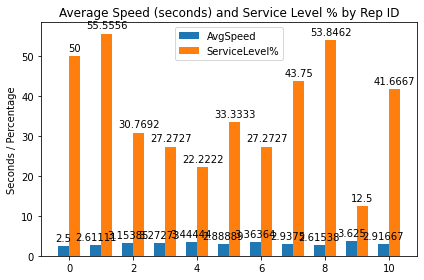

In [435]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
def viz2(dataframe):
    north_plt = dataframe.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
    print(north_plt)
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep

    quick_calls = dataframe[dataframe["Incoming Wait Time"] <= 2.0]
    quick_reps = quick_calls[["Rep ID", "Calls"]]
    quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
    total_calls_in = dataframe[dataframe["Incoming or Outgoing"] == "Incoming"]
    rep_calls = total_calls_in[["Rep ID", "Calls"]]     
    total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
    service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
    service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
    print(service_level)
    
    labels = north_plt['Rep ID']
    avgIWT = north_plt['Incoming Wait Time']
    repSLKPI = service_level['Service Level %']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, avgIWT, width, label='AvgSpeed')
    rects2 = ax.bar(x + width/2, repSLKPI, width, label='ServiceLevel%')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Seconds / Percentage')
    ax.set_title('Average Speed (seconds) and Service Level % by Rep ID')
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

viz2(df)

viz2(northcallcenter)

viz2(southcallcenter)



Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


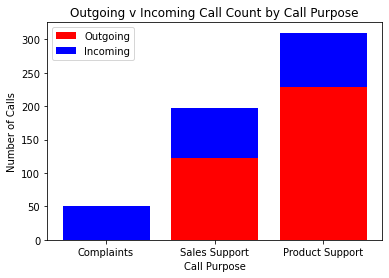

In [457]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

print(purpose_group)
print(purpose_counts)

print(complaints)
print(sales_support)
print(product_support)

# create data
x = ['Complaints', 'Sales Support', 'Product Support']
y1 = [0, 123, 228]
y2 = [51, 75, 82]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.legend(["Outgoing", "Incoming"])
plt.title("Outgoing v Incoming Call Count by Call Purpose")

plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

What is the average abandonment rate per queue?
-I chose a basic bar graph to show average abandonment rate per queue because it made the most sense with the amount of data required to demonstrate being minimal. Only one basic calculation was needed (average) and then plotting that amongst each queue it becomes clear a bar graph is a good choice to be able to visually compare rates between each queue. 

What is the service level and average speed of answer per each rep?
-I chose a subplot bar graph where there are two bars grouped by each rep ID (index). Reason I chose this format is because we are dealing with more information than the previous - two calculations per each rep. I feel it makes sense to have those bars grouped together by rep. I understand the seconds / percentage y axis doesnt really make too much sense, however with the printed chart, I think it makes it pretty clear what is being visualized.

For each type of call purpose, how many calls are outgoing vs. incoming?
-I chose a stacked bar graph to visualize number of incoming versus outgoing calls by call purpose. This graph has the most information and I think I did good representing the data in this format. The labels make it clear whats being measured and the visualization layout makes sense. We can clearly see that there were no outgoing calls for complaints, for sales support and product support, the centers make more outgoing calls than incoming. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

Looking at KPIs only, it appears to me that the South Call Center is operating more efficiently as a whole. 

North call center has an average abandonment rate of 2.86% while South Call Center has an average abandonment rate of 1.27%.

The service level KPI for the North Call Center is 40.24%, meaning ~40% of calls were answered within 2 seconds or less. The service level KPI for the South Call Center is a little worse, coming in at 38.1% of calls being answered within 2 seconds.

The average speed of answer for the North Call Center is 3.05 seconds, the South Call Center 3.0 seconds.


2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

There are 11 reps in South Call Center, while there are only 9 reps in North call center. South Call Center has slightly more calls than North Call Center does. Considering the resources, I think North is being pretty efficient compared to South. In my opinion North could use the extra resources.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

I think the data and information was sufficient. We could take a deeper dive into a longer time span to compare historical data and make sure the data is pretty normalized.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [458]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

print(call_times)

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:


    Time Block     Call Purpose Incoming or Outgoing  Calls
0      9:00 AM        Complaint             Incoming      1
1     11:00 AM    Sales Support             Incoming      1
2     11:00 AM    Sales Support             Incoming      1
3      4:00 PM    Sales Support             Incoming      1
4     12:00 PM  Product Support             Incoming      1
5      2:00 PM  Product Support             Incoming      1
6      2:00 PM  Product Support             Incoming      1
7      2:00 PM  Product Support             Incoming      1
8      3:00 PM  Product Support             Incoming      1
9      3:00 PM  Product Support             Incoming      1
10     4:00 PM  Product Support             Incoming      1
11     4:00 PM  Product Support             Incoming      1
12     4:00 PM  Product Support             Incoming      1
13     9:00 AM        Complaint             Incoming      1
14    12:00 PM        Complaint             Incoming      1
15     1:00 PM        Complaint         